# Phân tích phân phối và ngoại lệ

## Mục tiêu phân tích

1. Phân tích phân phối của các biến số
2. Phát hiện và xử lý ngoại lệ
3. Phân tích tương quan giữa các biến
4. Phân tích theo khu vực địa lý


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Cấu hình hiển thị
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

# import matplotlib.pyplot as plt
# print(plt.style.available)

## I. Đọc và kiểm tra dữ liệu đã xử lý


In [18]:
# Đọc dữ liệu đã xử lý
df = pd.read_csv('../data/interim/preprocess.csv')

print("Thông tin dữ liệu:")
print(df.info())

print("\nThống kê cơ bản:")
print(df.describe())

Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25714 entries, 0 to 25713
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price        25714 non-null  float64
 1   Area         25714 non-null  float64
 2   Bedrooms     25547 non-null  float64
 3   Bathrooms    25016 non-null  float64
 4   Floors       24851 non-null  float64
 5   AccessWidth  22304 non-null  float64
 6   FacadeWidth  23262 non-null  float64
 7   LegalStatus  25714 non-null  object 
 8   Furnishing   25714 non-null  object 
 9   District     25714 non-null  object 
 10  Province     25714 non-null  object 
dtypes: float64(7), object(4)
memory usage: 2.2+ MB
None

Thống kê cơ bản:
              Price          Area      Bedrooms     Bathrooms        Floors  \
count  25714.000000  25714.000000  25547.000000  25016.000000  24851.000000   
mean      10.882215     73.288744      4.881669      4.771786      3.915416   
std       11.3

## II. Phân tích phân phối các biến số


In [19]:
def plot_distribution(df, column, title=None):
    """Vẽ biểu đồ phân phối và boxplot cho một biến số"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Histogram và KDE
    sns.histplot(data=df, x=column, kde=True, ax=ax1)
    ax1.set_title(f'Phân phối {column}')
    
    # Boxplot
    sns.boxplot(data=df, y=column, ax=ax2)
    ax2.set_title(f'Boxplot {column}')
    
    if title:
        plt.suptitle(title)
    plt.tight_layout()
    plt.show()
    
    # In thống kê
    print(f"Thống kê {column}:")
    print(df[column].describe())
    print(f"\nSkewness: {df[column].skew():.2f}")
    print(f"Kurtosis: {df[column].kurtosis():.2f}")

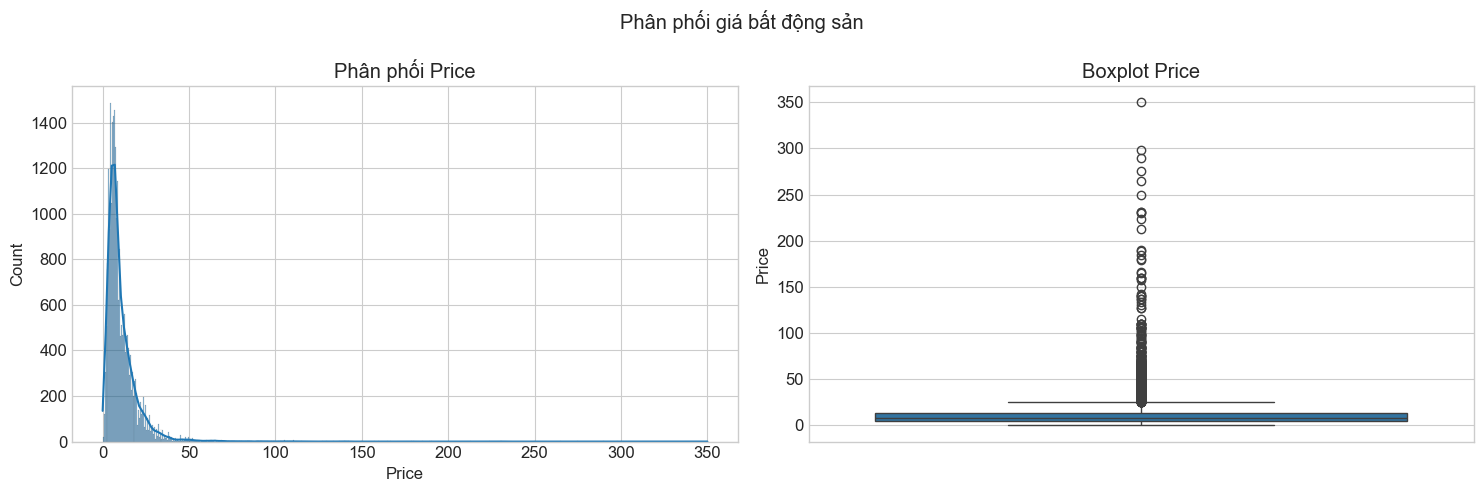

Thống kê Price:
count    25714.000000
mean        10.882215
std         11.369524
min          0.000000
25%          5.250000
50%          7.900000
75%         13.497500
max        350.000000
Name: Price, dtype: float64

Skewness: 8.38
Kurtosis: 145.26


In [20]:
# Phân tích phân phối giá
plot_distribution(df, 'Price', 'Phân phối giá bất động sản')

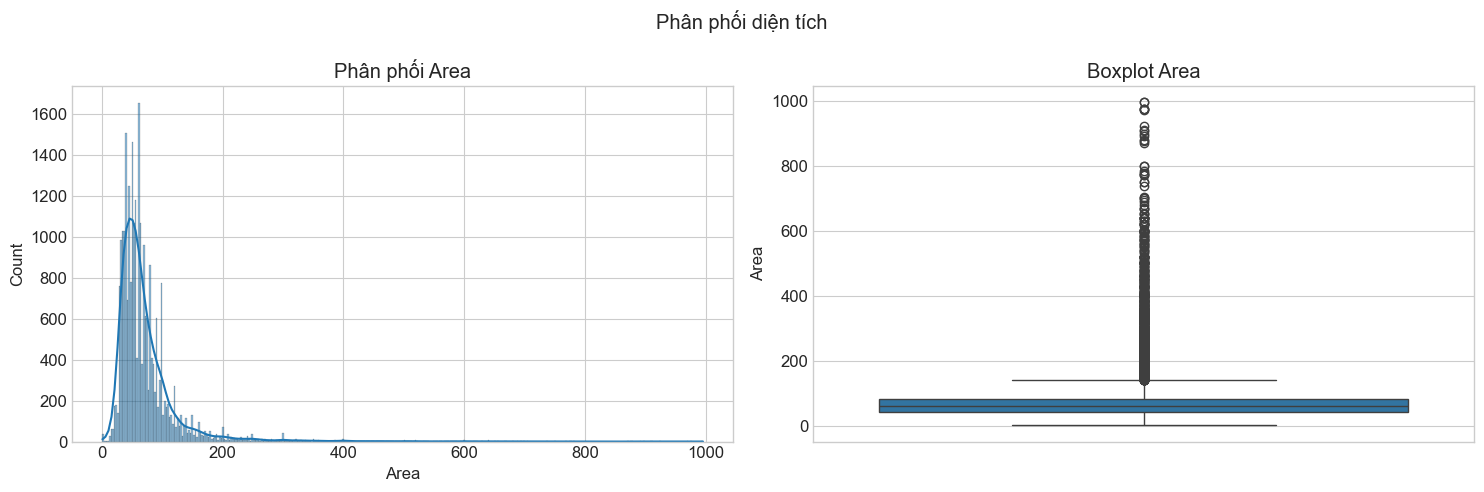

Thống kê Area:
count    25714.000000
mean        73.288744
std         61.639646
min          1.000000
25%         42.425000
50%         60.000000
75%         82.000000
max        995.100000
Name: Area, dtype: float64

Skewness: 5.48
Kurtosis: 47.36


In [21]:
# Phân tích phân phối diện tích
plot_distribution(df, 'Area', 'Phân phối diện tích')

## III. Phát hiện và xử lý ngoại lệ


In [22]:
def detect_outliers(df, column, method='iqr'):
    """Phát hiện ngoại lệ sử dụng IQR hoặc Z-score"""
    if method == 'iqr':
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
    else:  # z-score
        z_scores = np.abs(stats.zscore(df[column]))
        lower_bound = df[column].mean() - 3 * df[column].std()
        upper_bound = df[column].mean() + 3 * df[column].std()
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

In [23]:
# Phát hiện ngoại lệ trong giá
price_outliers, lower_price, upper_price = detect_outliers(df, 'Price')
print(f"Số lượng ngoại lệ trong giá: {len(price_outliers)}")
print(f"Khoảng giá hợp lý: {lower_price:.2f} - {upper_price:.2f} tỷ đồng")

# Phát hiện ngoại lệ trong diện tích
area_outliers, lower_area, upper_area = detect_outliers(df, 'Area')
print(f"\nSố lượng ngoại lệ trong diện tích: {len(area_outliers)}")
print(f"Khoảng diện tích hợp lý: {lower_area:.2f} - {upper_area:.2f} m²")

Số lượng ngoại lệ trong giá: 1451
Khoảng giá hợp lý: -7.12 - 25.87 tỷ đồng

Số lượng ngoại lệ trong diện tích: 1690
Khoảng diện tích hợp lý: -16.94 - 141.36 m²


## IV. Phân tích tương quan


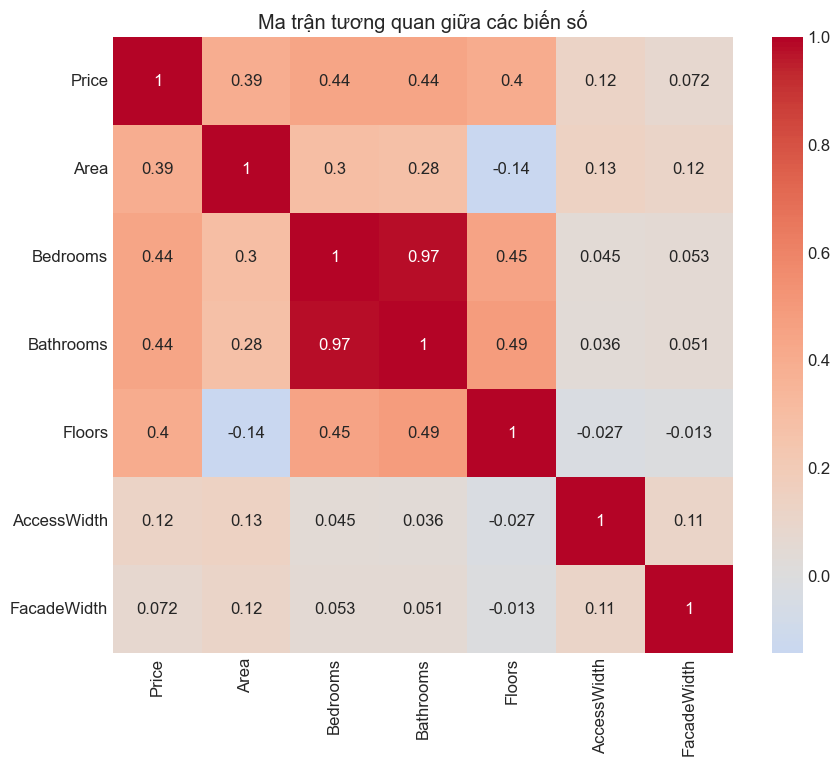

In [24]:
# Tính toán ma trận tương quan
numeric_cols = ['Price', 'Area', 'Bedrooms', 'Bathrooms', 'Floors', 'AccessWidth', 'FacadeWidth']
correlation_matrix = df[numeric_cols].corr()

# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Ma trận tương quan giữa các biến số')
plt.show()

## V. Phân tích theo khu vực địa lý


In [25]:
# Phân tích giá trung bình theo tỉnh/thành phố
province_stats = df.groupby('Province').agg({
    'Price': ['mean', 'median', 'count'],
    'Area': ['mean', 'median']
}).round(2)

print("Thống kê theo tỉnh/thành phố:")
print(province_stats)

Thống kê theo tỉnh/thành phố:
                 Price                  Area        
                  mean median  count    mean  median
Province                                            
An Giang          3.95   2.41      3  167.10  166.00
Bà Rịa Vũng Tàu   7.36   6.60    141  123.51   97.00
Bình Dương        4.05   3.60    658  104.60   83.00
Bình Phước        2.45   2.60     12  157.42  130.00
Bình Thuận        4.40   3.30     14  188.48  115.00
Bình Định        18.77   3.75     23  105.96   84.00
Bắc Giang         5.88   2.50      3  233.00  203.00
Bắc Ninh          6.11   3.40     12  118.34   80.50
Bến Tre           1.70   1.70      2  130.75  130.75
Cà Mau            3.05   3.05      2  123.00  123.00
Cần Thơ           4.14   3.92     56   89.39   81.05
Gia Lai           3.58   2.52      4  531.25  525.00
Hà Nam            2.51   2.51      1   66.00   66.00
Hà Nội           13.75  10.60  11845   56.81   48.00
Hòa Bình          3.82   2.85      8  181.12  101.50
Hưng Yên        

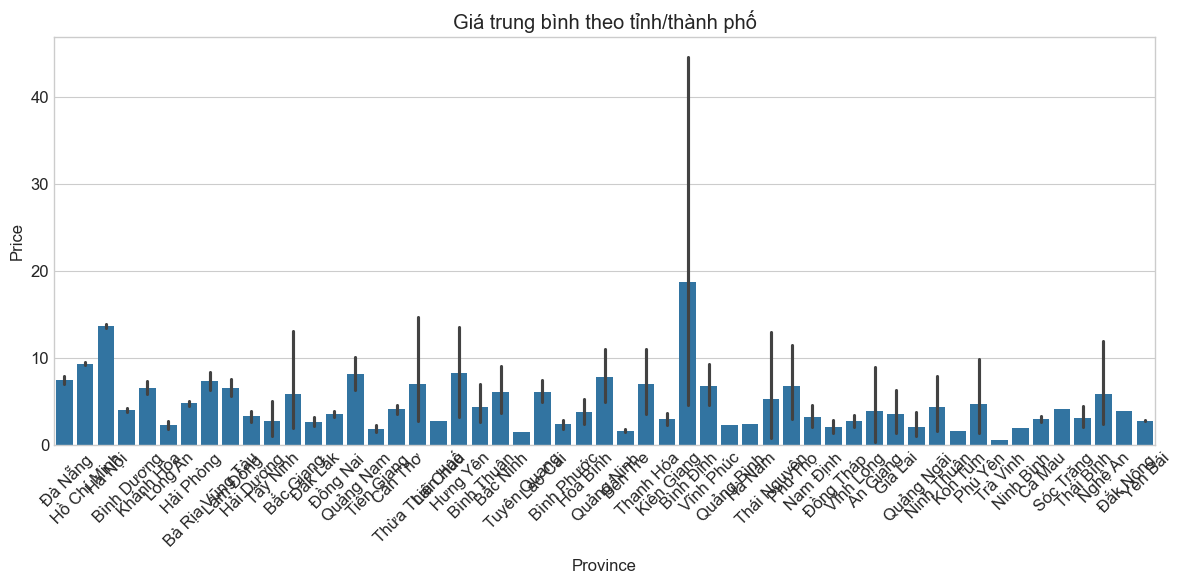

In [26]:
# Vẽ biểu đồ giá trung bình theo tỉnh/thành phố
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Province', y='Price')
plt.xticks(rotation=45)
plt.title('Giá trung bình theo tỉnh/thành phố')
plt.tight_layout()
plt.show()

## VI. Kết luận và Đề xuất

### 1. Phân phối dữ liệu

- [Thêm nhận xét về phân phối của các biến số]
- [Thêm nhận xét về các ngoại lệ phát hiện được]

### 2. Tương quan giữa các biến

- [Thêm nhận xét về mối tương quan giữa các biến]
- [Thêm nhận xét về ảnh hưởng của các biến đến giá]

### 3. Phân tích theo khu vực

- [Thêm nhận xét về sự khác biệt giữa các khu vực]
- [Thêm nhận xét về các yếu tố ảnh hưởng đến giá theo khu vực]

### 4. Đề xuất xử lý

- [Đề xuất cách xử lý ngoại lệ]
- [Đề xuất các biến mới có thể tạo thêm]
- [Đề xuất các bước phân tích tiếp theo]
